In [5]:
from cyclum import tuning

In [2]:
import numpy as np
import matplotlib.pyplot as plt

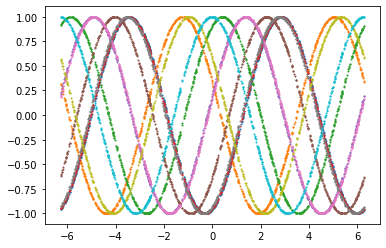

In [3]:
seed = 3
np.random.seed(seed)

cell_time = np.random.uniform(-2 * np.pi, 2 * np.pi, [1000, 1])

gene01_phase = np.random.uniform(0, 2 * np.pi, [1, 500])
gene01_time = np.random.normal(0, 0.1, [1, 500])
gene01_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0_phase = np.random.uniform(0, 2 * np.pi, [1, 800])

gene1_time = np.random.normal(0, 0.1, [1, 500])
gene1_speed = np.random.uniform(0.5, 1.5, [1, 500])

gene0 = np.sin(cell_time - gene0_phase)
gene1 = np.tanh(gene1_speed * (cell_time - gene1_time))
gene01 = np.sin(cell_time - gene01_phase) + np.tanh(gene01_speed * (cell_time - gene01_time))

for i in range(10):
    plt.scatter(x=cell_time, y=gene0[:, i], s=1)

In [4]:
gene = np.hstack([gene0, gene1, gene01])

In [6]:
model = tuning.CyclumAutoTune(gene, epochs=400, early_stop=False)
model.show_elbow()
model.show_structure()

Auto tuning number of linear components...
Performing PCA...
Training Autoencoder with...
    0 linear dimensions...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch: 100/1000, loss:  0.3659, time elapsed:  35.88stime left:  322.93s
epoch: 200/1000, loss:  0.3621, time elapsed:  47.48stime left:  189.90s
epoch: 300/1000, loss:  0.3609, time elapsed:  57.93stime left:  135.17s
epoch: 400/1000, loss:  0.3598, time elapsed:  68.21stime left:  102.32s
epoch: 500/1000, loss:  0.3606, time elapsed:  80.04stime left:  80.04s
epoch: 600/1000, loss:  0.3600, time elapsed:  91.63stime left:  61.08s
epoch: 700/1000, loss:  0.3585, time elapsed:  103.23stime left:  44.24s
epoch: 800/1000, loss:  0.3586, time elapsed:  114.65stime left:  28.66s
epoch: 900/1000, loss:  0.3588, time elapsed:  126.21stime left:  14.02s
epoch: 1000/1000, loss:  0.3587, time elapsed:  137.73stime left:  0.00s
    1 linear dimensions...
epoch: 

TypeError: '>' not supported between instances of 'NoneType' and 'int'

epoch: 100/1000, loss:  0.2978, total train time:  13.25s
epoch: 200/1000, loss:  0.2834, total train time:  26.22s
epoch: 300/1000, loss:  0.2806, total train time:  39.22s
epoch: 400/1000, loss:  0.2779, total train time:  52.24s
epoch: 500/1000, loss:  0.2764, total train time:  65.32s
epoch: 600/1000, loss:  0.2760, total train time:  78.32s
epoch: 700/1000, loss:  0.2757, total train time:  91.38s
epoch: 800/1000, loss:  0.2758, total train time:  104.25s
epoch: 900/1000, loss:  0.2757, total train time:  117.27s
epoch: 1000/1000, loss:  0.2745, total train time:  130.26s
epoch: 100/1000, loss:  0.1072, total train time:  14.50s
epoch: 200/1000, loss:  0.0966, total train time:  28.55s
epoch: 300/1000, loss:  0.0875, total train time:  42.38s
epoch: 400/1000, loss:  0.0891, total train time:  56.48s
epoch: 500/1000, loss:  0.0827, total train time:  70.49s
epoch: 600/1000, loss:  0.0829, total train time:  84.55s
epoch: 700/1000, loss:  0.0815, total train time:  98.53s
epoch: 800

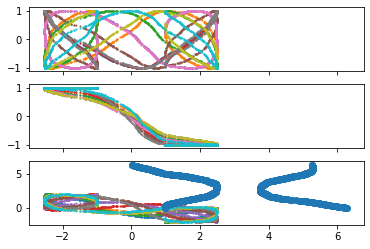

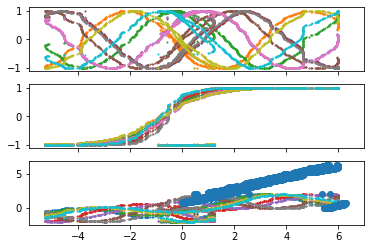

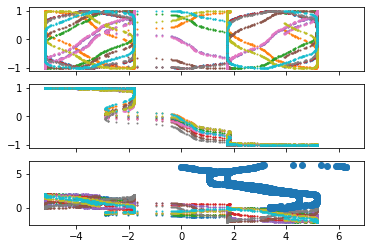

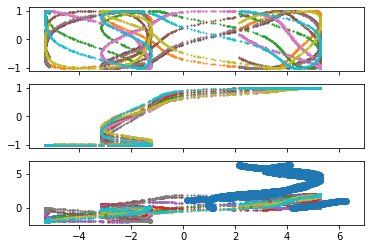

In [11]:
ae_loss = []
for i in range(4):
    model = models.AutoEncoder(input_width=gene.shape[1], 
                           encoder_depth=2, 
                           encoder_width=50, 
                           n_circular_unit=1,
                           n_logistic_unit=0,
                           n_linear_unit=0,
                           n_linear_bypass=i,
                           dropout_rate=0.1,
                           nonlinear_reg=1e-4)

    history = model.train(gene, epochs=1000, verbose=100, rate=2e-4)

    pseudotime = model.predict_pseudotime(gene)
    
    fig, ax = plt.subplots(3, 1, sharex=True)
    
    for i in range(10):
        ax[0].scatter(x=pseudotime[0], y=gene0[:, i], s=1)
    
    for i in range(10):
        ax[1].scatter(x=pseudotime[0], y=gene1[:, i], s=1)
    
    for i in range(10):
        ax[2].scatter(x=pseudotime[0], y=gene01[:, i], s=1)

    plt.figure()
    plt.scatter(pseudotime[0] % (2 * np.pi), cell_time % (2 * np.pi))

    ae_loss.append(history.history['loss'][-1])

In [12]:
pca_model = PCA(n_components=5)
pca_load = pca_model.fit_transform(gene)
pca_comp = pca_model.components_

print(pca_load.shape)
print(pca_comp.shape)

(1000, 5)
(5, 1800)


## Choose best number of the linear components

In [ ]:
pca_loss = [mse(gene, pca_load[:, 0:(i+1)] @ pca_comp[0:(i+1), :]) for i in range(5)]
plt.scatter([0, 1, 2, 3, 4], pca_loss)
plt.scatter([0, 1, 2, 3], ae_loss)
plt.legend(['PCA', 'AE'])

plt.plot([0, 1, 2, 3, 4], pca_loss)
plt.plot([0, 1, 2, 3], ae_loss)

plt.xticks([0, 1, 2, 3, 4])